**# OBJETIVO:** Datos de mujeres en Bogotá (adjunto info con fuentes para montar eso en tiempo real): brechas salariales.


In [1]:
!wget "https://storage.googleapis.com/piloto_maker_kits/Data_sin_procesar_%3D(/multiprop%C3%B3sito/Composicion%20del%20hogar%20y%20demografia%20(%20Capitulo%20E).csv"

--2020-11-23 20:28:31--  https://storage.googleapis.com/piloto_maker_kits/Data_sin_procesar_%3D(/multiprop%C3%B3sito/Composicion%20del%20hogar%20y%20demografia%20(%20Capitulo%20E).csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39558986 (38M) [application/octet-stream]
Saving to: ‘Composicion del hogar y demografia ( Capitulo E).csv.2’

Composicion del hog 100%[===================>]  37.73M   166MB/s    in 0.2s    

2020-11-23 20:28:31 (166 MB/s) - ‘Composicion del hogar y demografia ( Capitulo E).csv.2’ saved [39558986/39558986]



In [2]:
!wget "https://storage.googleapis.com/piloto_maker_kits/Data_sin_procesar_%3D(/multiprop%C3%B3sito/Fuerza%20de%20trabajo%20%20(cap%C3%ADtulo%20K).csv"

--2020-11-23 20:28:32--  https://storage.googleapis.com/piloto_maker_kits/Data_sin_procesar_%3D(/multiprop%C3%B3sito/Fuerza%20de%20trabajo%20%20(cap%C3%ADtulo%20K).csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61223311 (58M) [application/octet-stream]
Saving to: ‘Fuerza de trabajo  (capítulo K).csv.2’

Fuerza de trabajo   100%[===================>]  58.39M   148MB/s    in 0.4s    

2020-11-23 20:28:32 (148 MB/s) - ‘Fuerza de trabajo  (capítulo K).csv.2’ saved [61223311/61223311]



In [3]:
!ls

'Composicion del hogar y demografia ( Capitulo E).csv'
'Composicion del hogar y demografia ( Capitulo E).csv.1'
'Composicion del hogar y demografia ( Capitulo E).csv.2'
'Fuerza de trabajo  (capítulo K).csv'
'Fuerza de trabajo  (capítulo K).csv.1'
'Fuerza de trabajo  (capítulo K).csv.2'
 sample_data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import norm
from statistics import mean, stdev


In [5]:
df_cap_E = pd.read_csv('Composicion del hogar y demografia ( Capitulo E).csv')

In [6]:
df_cap_K = pd.read_csv('Fuerza de trabajo  (capítulo K).csv')

In [7]:
df_cap_E.columns 

Index(['DIRECTORIO_PER', 'DIRECTORIO_HOG', 'DIRECTORIO', 'SECUENCIA_P',
       'ORDEN', 'NPCEP4', 'NPCEP5', 'NPCEP6', 'NPCEP7', 'NPCEP8', 'NPCEP8A',
       'NPCEP9', 'NPCEP9A', 'NPCEP9B', 'NPCEP10', 'NPCEP11A', 'NPCEP11AA',
       'NPCEP11AB', 'NPCEP11AC', 'NPCEP11', 'NPCEP13', 'NPCEP13A', 'NPCEP13B',
       'NPCEP13C', 'NPCEP14', 'NPCEP15', 'NPCEP16A', 'NPCEP16B', 'NPCEP16C',
       'NPCEP16D', 'NPCEP16E', 'NPCEP16F', 'NPCEP16G', 'NPCEP16H', 'NPCEP16I',
       'NPCEP16J', 'NPCEP16K', 'NPCEP16A1', 'NPCEP16AA', 'NPCEP16AB',
       'NPCEP16B1', 'NPCEP17', 'NPCEP18', 'NPCEP19', 'NPCEP21', 'NPCEP21A',
       'NPCEP22', 'NPCEP22A', 'NPCEP24', 'NPCEP24A', 'NPCEP25', 'NPCEP25A',
       'NPCEP27', 'NPCEP26', 'NPCEP5A', 'FEX_C'],
      dtype='object')

In [8]:
df_cap_K.columns

Index(['DIRECTORIO_PER', 'DIRECTORIO_HOG', 'DIRECTORIO', 'SECUENCIA_P',
       'ORDEN', 'NPCKP1', 'NPCKP2', 'NPCKP3', 'NPCKP4', 'NPCKP5',
       ...
       'NPCKP59DA', 'NPCKP59E', 'NPCKP59EA', 'NPCKP59F', 'NPCKP59FA',
       'NPCKP59G', 'NPCKP59GA', 'NPCKP59H', 'NPCKP59HA', 'FEX_C'],
      dtype='object', length=133)

In [9]:
df_cap_E.shape

(319952, 56)

In [10]:
df_cap_K.shape

(281182, 133)

In [11]:
df_cap_E = df_cap_E.filter(['DIRECTORIO_PER',"NPCEP4", 'NPCEP5'], axis=1)

In [12]:
df_cap_K = df_cap_K.filter(['DIRECTORIO_PER', 'NPCKP23'], axis=1)

In [13]:
df_cap_E.head()

,DIRECTORIO_PER,NPCEP4,NPCEP5
0,10100011,56,1
1,10100012,48,2
2,10100013,22,2
3,10100111,42,1
4,10100112,43,2


In [14]:
df_cap_K.head()

,DIRECTORIO_PER,NPCKP23
0,10100011,NaN
1,10100012,5000000.0
2,10100013,900000.0
3,10100111,1900000.0
4,10100112,NaN




*   Filtrar los datos para los integrantes del hogar mayores a 10 años, dado que sólo para ellos hay información en el capítulo de fuerza de trabajo, lo que hace posible correlacionar los dataframes del capítulo E y K.



In [15]:
df_cap_E = df_cap_E.loc[df_cap_E["NPCEP4"]>=10, :]

In [16]:
df_cap_E.shape

(281182, 3)

In [17]:
df_cap_K.shape

(281182, 2)

In [18]:
df_cap_E.duplicated().sum()

0

In [19]:
df_brecha_salarial = pd.merge(df_cap_E, df_cap_K, on= 'DIRECTORIO_PER')

In [20]:
df_brecha_salarial.head()

,DIRECTORIO_PER,NPCEP4,NPCEP5,NPCKP23
0,10100011,56,1,NaN
1,10100012,48,2,5000000.0
2,10100013,22,2,900000.0
3,10100111,42,1,1900000.0
4,10100112,43,2,NaN


In [21]:
df_brecha_salarial = df_brecha_salarial.rename(columns={"NPCEP4":"EDAD", "NPCEP5":"SEXO", "NPCKP23":"SALARIO"})

In [22]:
df_brecha_salarial = df_brecha_salarial.loc[df_brecha_salarial["EDAD"]>18, :]

In [23]:
df_brecha_salarial.shape

(239505, 4)

In [24]:
df_brecha_salarial["SEXO"].value_counts()

2    130009
1    109481
3        15
Name: SEXO, dtype: int64

In [25]:
df_brecha_salarial["SEXO"] = df_brecha_salarial["SEXO"].replace(1, "HOMBRE")
df_brecha_salarial["SEXO"] = df_brecha_salarial["SEXO"].replace(2, "MUJER")
df_brecha_salarial["SEXO"] = df_brecha_salarial["SEXO"].replace(3, "INTERSEXUAL")

In [26]:
df_brecha_salarial.describe()

,DIRECTORIO_PER,EDAD,SALARIO
count,2.395050e+05,239505.000000,9.447400e+04
mean,1.965630e+07,44.290416,1.602084e+06
std,6.609031e+06,17.223942,2.070475e+06
min,1.010001e+07,19.000000,0.000000e+00
25%,1.456891e+07,30.000000,7.377170e+05
50%,1.823401e+07,42.000000,9.000000e+05
75%,2.491881e+07,57.000000,1.700000e+06
max,3.175431e+08,107.000000,3.300000e+07


In [27]:
df_brecha_salarial.isnull().value_counts()

DIRECTORIO_PER  EDAD   SEXO   SALARIO
False           False  False  True       145031
                              False       94474
dtype: int64

In [28]:
salarios_df = df_brecha_salarial.loc[df_brecha_salarial["SALARIO"].isnull() == False]

In [29]:
salarios_df.SALARIO.value_counts()

800000.0      7181
1200000.0     5052
1000000.0     4995
900000.0      4468
737717.0      4425
              ... 
1542000.0        1
15900000.0       1
731717.0         1
2927000.0        1
2365000.0        1
Name: SALARIO, Length: 2247, dtype: int64

In [30]:
salarios_filtrados = salarios_df.loc[(salarios_df.SALARIO != 0.0) & (salarios_df.SALARIO != 99.0) & (salarios_df.SALARIO != 98.0)]

In [31]:
salarios_filtrados.SALARIO.describe()

count    9.086700e+04
mean     1.665677e+06
std      2.085933e+06
min      2.000000e+03
25%      7.377170e+05
50%      9.850000e+05
75%      1.800000e+06
max      3.300000e+07
Name: SALARIO, dtype: float64

In [32]:
salarios_filtrados.to_csv("SALARIOS_ORIG_LIMPIOS.csv", index= False)

In [32]:
len(salarios_filtrados.SALARIO.loc[salarios_filtrados.SALARIO<=300000]) /  9.086700e+04   #0.04203946427195791
# len(salarios_filtrados.SALARIO.loc[salarios_filtrados.SALARIO>5000000]) /  9.086700e+04 #0.04537400816578076

0.04203946427195791

In [33]:
salarios_90_df = salarios_filtrados.loc[(salarios_filtrados.SALARIO>300000) & (salarios_filtrados.SALARIO<5000000)]

In [118]:
300000 + ((5000000 - 300000)/20) + 470000*9

4765000.0

Rangos de salarios
*   rango 1 < 770000), mp= 535000
*   rango 2 = [770000 - 1240000), mp=1005000
*   rango 3 = [1240000 - 1710000), mp=1475000
*   rango 4 = [1710000 - 2180000), mp=1945000
*   rango 5 = [2180000 - 2650000), mp=2415000
*   rango 6 = [2650000 - 3120000), mp=2885000
*   rango 7 = [3120000 - 3590000), mp=3355000
*   rango 8 = [3590000 - 4060000), mp=3825000
*   rango 9 = [4060000 - 4530000), mp=4295000
*   rango 10 > 4530000, mp= 4765000


In [121]:
salarios_90_df.SALARIO.loc[salarios_90_df.SALARIO<770000] = 535000
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=770000) & (salarios_filtrados.SALARIO<1240000)] = 1005000 
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=1240000) & (salarios_filtrados.SALARIO<1710000)] = 1475000 
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=1710000) & (salarios_filtrados.SALARIO<2180000)] = 1945000 
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=2180000) & (salarios_filtrados.SALARIO<2650000)] = 2415000 
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=2650000) & (salarios_filtrados.SALARIO<3120000)] = 2885000
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=3120000) & (salarios_filtrados.SALARIO<3590000)] = 3355000 
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=3590000) & (salarios_filtrados.SALARIO<4060000)] = 3825000
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=4060000) & (salarios_filtrados.SALARIO<4530000)] = 4295000 
salarios_90_df.SALARIO.loc[(salarios_90_df.SALARIO>=4530000)] = 4765000


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._seti

In [122]:
salarios_90_df.SALARIO.value_counts()

1005000.0    30398
535000.0     24029
1475000.0     9750
1945000.0     5902
2415000.0     3526
2885000.0     3389
3825000.0     1935
3355000.0     1737
4295000.0      962
4765000.0      312
Name: SALARIO, dtype: int64

In [123]:
salarios_90_df

,DIRECTORIO_PER,EDAD,SEXO,SALARIO
2,10100013,22,MUJER,1005000.0
3,10100111,42,HOMBRE,1945000.0
7,10100212,33,HOMBRE,1005000.0
9,10100312,51,MUJER,1475000.0
14,10100711,42,MUJER,1005000.0
...,...,...,...,...
281152,31781811,47,HOMBRE,1005000.0
281165,31783112,22,HOMBRE,535000.0
281168,31783411,55,HOMBRE,1005000.0
281170,31783511,54,HOMBRE,535000.0


In [124]:
salarios_90_df.to_csv("SALARIOS_RANGOS.csv", index= False)

Encontrar los valores de los salarios que se encuentran en las divisiones de 10 intervalos completos.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


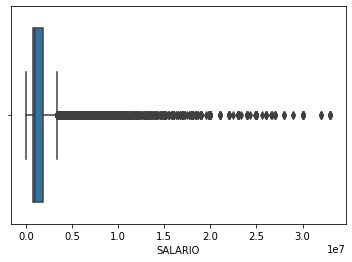

In [34]:
import seaborn as sns
sns.boxplot(salarios_filtrados.SALARIO)

In [2]:
7.377170e+05 - 1.5 *(1.800000e+06 - 7.377170e+05)

-855707.5

In [33]:
salarios_series = salarios_filtrados.SALARIO

In [34]:
#Cuántos registros hay más allá del 75% de los datos
mayores = salarios_series.loc[salarios_series > 1.700000e+06]

In [35]:
volados = mayores.loc[mayores< 3.300000e+07]

In [36]:
len(volados)/8.069000e+04

0.2833312678150948

In [37]:
salarios_series.describe()

count    9.086700e+04
mean     1.665677e+06
std      2.085933e+06
min      2.000000e+03
25%      7.377170e+05
50%      9.850000e+05
75%      1.800000e+06
max      3.300000e+07
Name: SALARIO, dtype: float64

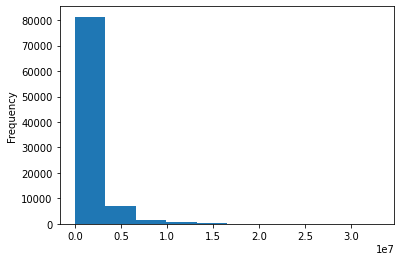

In [39]:
salarios_series.plot.hist();

In [41]:
cuartil1 = salarios_series.loc[salarios_series < 7.377170e+05]

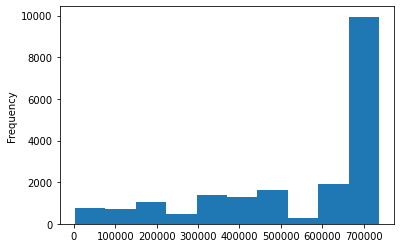

In [42]:
cuartil1.plot.hist()

In [44]:
cuartil2 = salarios_series.loc[salarios_series.between(7.377170e+05, 9.850000e+05, inclusive=True)]

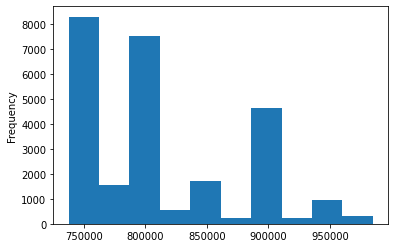

In [45]:
cuartil2.plot.hist()

In [46]:
cuartil3 = salarios_series.loc[salarios_series.between(9.850000e+05, 1.800000e+06, inclusive=True)]

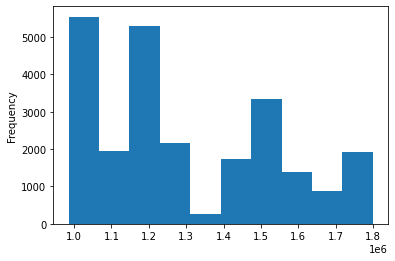

In [47]:
cuartil3.plot.hist()

In [48]:
cuartil4 = salarios_series.loc[salarios_series > 1.800000e+06]

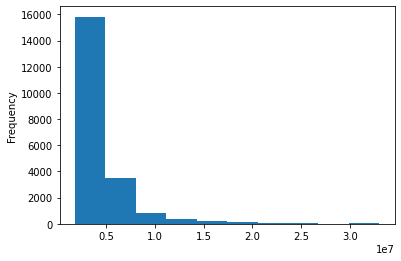

In [49]:
cuartil4.plot.hist()

In [50]:
mean_ls = [mean(cuartil1), mean(cuartil2), mean(cuartil3), mean(cuartil4)]
mean_ls

[552190.4341868013, 811078.3969492046, 1299971.4576651568, 4188699.4914484997]

In [52]:
stdev_ls = [stdev(cuartil1), stdev(cuartil2), stdev(cuartil3), stdev(cuartil4)]
stdev_ls

[221368.93784409246, 66164.85798858493, 248775.0438262329, 3191475.8886217107]

In [53]:
cut_min_series = salarios_series.loc[salarios_series > mean(cuartil1) + stdev(cuartil1)]

In [54]:
cut_series = cut_min_series.loc[cut_min_series < mean(cuartil4) + stdev(cuartil4)]
cut_series.describe()

count    6.063300e+04
mean     1.799316e+06
std      1.282580e+06
min      7.737000e+05
25%      9.000000e+05
50%      1.250000e+06
75%      2.100000e+06
max      7.377117e+06
Name: SALARIO, dtype: float64

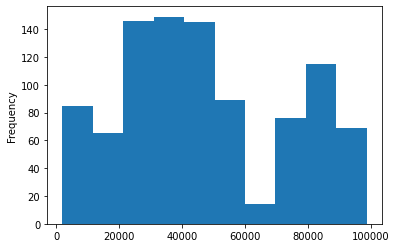

In [ ]:
salarios_series.loc[salarios_series < 100000].plot.hist()

In [ ]:
salarios_bajos_df = df_brecha_salarial.loc[df_brecha_salarial["SALARIO"]<700000]

In [ ]:
salarios_bajos_df.shape

(13336, 4)

(array([4300.,  758.,  952.,  493., 1078., 1555.,  555., 1373., 1563.,
         709.]),
 array([     0.,  69800., 139600., 209400., 279200., 349000., 418800.,
        488600., 558400., 628200., 698000.]),
 <a list of 10 Patch objects>)

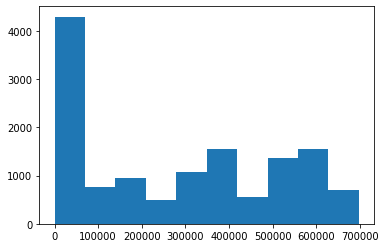

In [ ]:
plt.hist(salarios_bajos_df["SALARIO"])

In [ ]:
salarios_mujeres = salarios_bajos_df["SALARIO"].loc[salarios_bajos_df["SEXO"] == "MUJER"]
salarios_hombres = salarios_bajos_df["SALARIO"].loc[salarios_bajos_df["SEXO"] == "HOMBRE"]

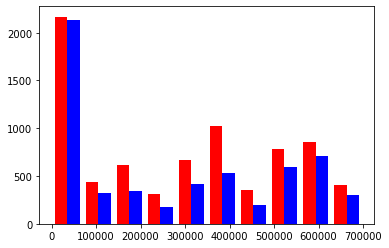

In [ ]:
ax_menos_setecientos_mil = plt.hist([salarios_mujeres, salarios_hombres], color= ["r", "b"])


In [ ]:
len(ax_menos_setecientos_mil)

3

In [ ]:
salarios_cuartil2 = salarios_filtrados.loc[salarios_filtrados["SALARIO"].between(1.456891e+07, 1.823401e+07, inclusive=True)]

In [ ]:
salarios_mujeres_25_50 = salarios_cuartil2["SALARIO"].loc[salarios_cuartil2["SEXO"] == "MUJER"]
salarios_hombres_25_50 = salarios_cuartil2["SALARIO"].loc[salarios_cuartil2["SEXO"] == "HOMBRE"]

(array([[ 0., 30.,  2.,  0., 10.,  0.,  2.,  6.,  0., 13.],
        [ 4., 87.,  1.,  2., 18.,  6.,  1., 18.,  1., 26.]]),
 array([14600000., 14940000., 15280000., 15620000., 15960000., 16300000.,
        16640000., 16980000., 17320000., 17660000., 18000000.]),
 <a list of 2 Lists of Patches objects>)

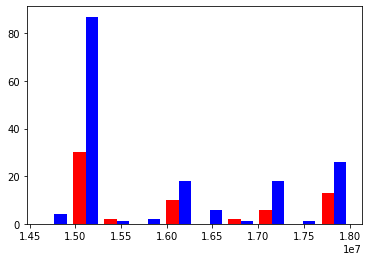

In [ ]:
plt.hist([salarios_mujeres_25_50, salarios_hombres_25_50], color= ["r", "b"])

In [ ]:
mujeres = salarios_filtrados.loc[salarios_filtrados["SEXO"] == "MUJER"]
len(mujeres)

44025

In [ ]:
hombres = salarios_filtrados.loc[salarios_filtrados["SEXO"] == "HOMBRE"]
len(hombres)

46834

In [ ]:
salarios_cuartil3 = salarios_filtrados.loc[salarios_filtrados["SALARIO"].between(1.823401e+07, 2.491881e+07, inclusive=True)]

In [ ]:
salarios_mujeres_50_70 = salarios_cuartil3["SALARIO"].loc[salarios_cuartil3["SEXO"] == "MUJER"]
salarios_hombres_50_70 = salarios_cuartil3["SALARIO"].loc[salarios_cuartil3["SEXO"] == "HOMBRE"]

(array([[ 2.,  4., 16.,  0.,  4.,  2.,  1.,  3.,  4.,  1.],
        [ 5.,  9., 33.,  0.,  6.,  8.,  0.,  9.,  8.,  1.]]),
 array([18300000., 18950000., 19600000., 20250000., 20900000., 21550000.,
        22200000., 22850000., 23500000., 24150000., 24800000.]),
 <a list of 2 Lists of Patches objects>)

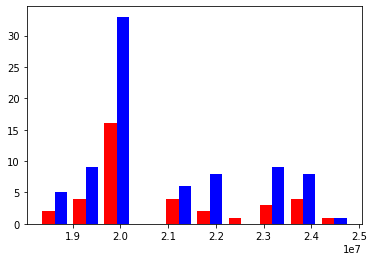

In [ ]:
plt.hist([salarios_mujeres_50_70, salarios_hombres_50_70], color= ["r", "b"])

In [ ]:
def plot_hist(df, min, max, inclusive=False):
  plot_df = df.loc[df.SALARIO.between(min, max, inclusive), :]
  plot_men_series = plot_df.loc[plot_df.SEXO == "HOMBRE", "SALARIO"]
  plot_women_series = plot_df.loc[plot_df.SEXO == "MUJER", "SALARIO"]
  return plt.hist([plot_men_series, plot_women_series], color=["r", "b"])

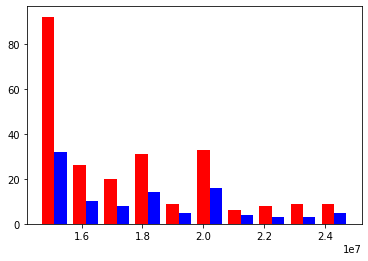

In [ ]:
plot_hist(salarios_filtrados, 1.456891e+07, 2.491881e+07, inclusive=True);

In [ ]:
salarios_df.SEXO.value_counts()

HOMBRE         48668
MUJER          45798
INTERSEXUAL        8
Name: SEXO, dtype: int64

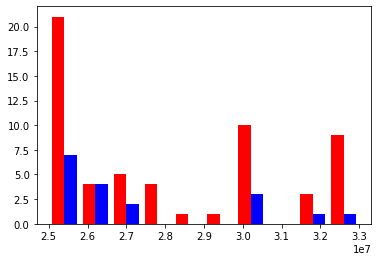

In [ ]:
plot_hist(salarios_filtrados, 2.491881e+07, 3.175431e+08, inclusive=True);

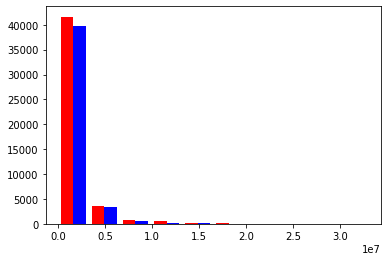

In [ ]:
plot_hist(salarios_filtrados, 0, 3.175431e+08, inclusive=True);

In [ ]:
salarios_filtrados.describe()

,DIRECTORIO_PER,EDAD,SALARIO
count,9.086700e+04,90867.000000,9.086700e+04
mean,1.959323e+07,37.719315,1.665677e+06
std,6.507893e+06,11.847289,2.085933e+06
min,1.010001e+07,19.000000,2.000000e+03
25%,1.457691e+07,28.000000,7.377170e+05
50%,1.820201e+07,36.000000,9.850000e+05
75%,2.482776e+07,47.000000,1.800000e+06
max,3.175431e+08,99.000000,3.300000e+07


In [ ]:
salarios_filtrados

,DIRECTORIO_PER,EDAD,SEXO,SALARIO
1,10100012,48,MUJER,5000000.0
2,10100013,22,MUJER,900000.0
3,10100111,42,HOMBRE,1900000.0
7,10100212,33,HOMBRE,820000.0
9,10100312,51,MUJER,1470000.0
...,...,...,...,...
281162,31782511,29,HOMBRE,300000.0
281165,31783112,22,HOMBRE,715000.0
281168,31783411,55,HOMBRE,784000.0
281170,31783511,54,HOMBRE,400000.0


In [ ]:
copy = salarios_filtrados.copy()

In [ ]:
copy.SALARIO.loc[copy.SALARIO > 2500000] = 2500000


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
copy.describe()

,DIRECTORIO_PER,EDAD,SALARIO
count,9.086700e+04,90867.000000,9.086700e+04
mean,1.959323e+07,37.719315,1.251125e+06
std,6.507893e+06,11.847289,7.045616e+05
min,1.010001e+07,19.000000,2.000000e+03
25%,1.457691e+07,28.000000,7.377170e+05
50%,1.820201e+07,36.000000,9.850000e+05
75%,2.482776e+07,47.000000,1.800000e+06
max,3.175431e+08,99.000000,2.500000e+06


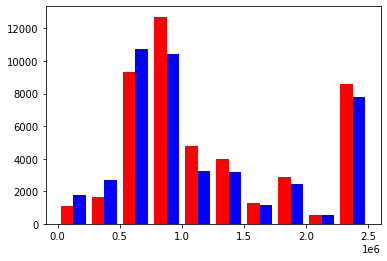

In [ ]:
plot_hist(copy, 0, 2.500000e+06, inclusive=True);

In [ ]:
mujeres_series = copy.SALARIO.loc[copy.SEXO == "MUJER"]

In [ ]:
hombres_series = copy.SALARIO.loc[copy.SEXO == "HOMBRE"]

In [ ]:
norm.fit(hombres_series)

(1282837.3745142417, 691377.5155718924)

1. Hacer el fit en el df general
2. Hacer la Gaussiana en cada cuartil
3. Qué tanto se mueven las diferencias entre cuartiles



Consideraciones en los valores de salario:
*  Si la persona recibe salario con periodicidad diferente a mensual, se hace la equivalencia a mes.
*  Si la persona no recibió salario en dinero, se escribe 00.
*  Si la persona no sabe si recibe el ingreso, se escribe 99.
*  Si la persona manifiesta recibir pero no sabe el monto, se escribe 98.



In [ ]:
copy.describe()

,DIRECTORIO_PER,EDAD,SALARIO
count,9.086700e+04,90867.000000,9.086700e+04
mean,1.959323e+07,37.719315,1.251125e+06
std,6.507893e+06,11.847289,7.045616e+05
min,1.010001e+07,19.000000,2.000000e+03
25%,1.457691e+07,28.000000,7.377170e+05
50%,1.820201e+07,36.000000,9.850000e+05
75%,2.482776e+07,47.000000,1.800000e+06
max,3.175431e+08,99.000000,2.500000e+06


In [ ]:
copy.to_csv("BRECHA_SALARIAL.csv", index= False)

In [ ]:
!cp /content/BRECHA_SALARIAL.csv "/content/drive/My Drive/MakerKits (piloto Bogotá)/Datos/Datos limpios"